# 1. Import and Install Dependencies

In [1]:
!pip install pip==21.3.1

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.9 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 3.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 5.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.7 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.2/1.7 MB 5.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.7 MB 4.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.7 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 1.7/1.7 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.2 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\Administrator\Desktop\Action_Analyzer\venv\Scripts\python.exe -m pip install pip==21.3.1


In [3]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(0,255,102), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [53]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        inverted_frame = cv2.flip(frame,1)
                
        # Make detections
        image, results = mediapipe_detection(inverted_frame, holistic)
        
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [44]:
if (results.left_hand_landmarks):
    print(len(results.left_hand_landmarks.landmark))

type

In [63]:
draw_styled_landmarks(inverted_image, results)

NameError: name 'inverted_image' is not defined

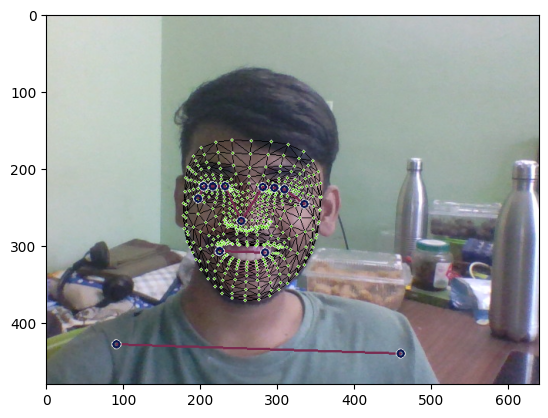

In [64]:
plt.imshow(cv2.cvtColor(inverted_frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [21]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

### Showing Error Because in the above Image No left hand is detected in order to capture landmarks

### Separating the Pose,Face,LeftHand,RightHand Landmarks into 4 numpy arrays

In [65]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

### Below Function Extracts KeyPoints from the given results and returns a concatenated array of pose,face,lefthand and righthand arrays

In [66]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [50]:
result_test = extract_keypoints(results)

In [51]:
result_test

array([ 0.50570261,  0.42038119, -1.1342752 , ...,  0.        ,
        0.        ,  0.        ])

In [52]:
468*3+33*4+21*3+21*3

1662

# 4. Setup Folders for Collection

In [91]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Project_Data') 

# Actions that we try to detect
actions = np.array(['good_work','peace','heart'])

# forty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [92]:
for action in actions: 
    for i in range(2):
        if i == 0:
            try:
                os.makedirs(os.path.join(DATA_PATH,action,"left"))
                for sequence in range(no_sequences):
                    try:
                        os.makedirs(os.path.join(DATA_PATH, action,'left',str(sequence)))
                    except:
                        pass
            except:
                pass

        if i == 1:
            try:
                os.makedirs(os.path.join(DATA_PATH,action,"right"))
                for sequence in range(no_sequences):
                    try:
                        os.makedirs(os.path.join(DATA_PATH, action,'right',str(sequence)))
                    except:
                        pass
            except:
                pass
                        

# 5. Collect Keypoint Values for Training and Testing

In [93]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                inverted_frame = cv2.flip(frame,1)
                
                # Make detections
                
                image, results = mediapipe_detection(frame, holistic)
                inverted_image,results_inverted = mediapipe_detection(inverted_frame,holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                #draw_styled_landmarks(inverted_image,results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                inverted_keypoints = extract_keypoints(results_inverted)
                npy_path0 = os.path.join(DATA_PATH, action,'right',str(sequence), str(frame_num))
                npy_path1 = os.path.join(DATA_PATH, action,'left',str(sequence), str(frame_num))
                np.save(npy_path0, keypoints)
                np.save(npy_path1,inverted_keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Administrator\Desktop\Action_Analyzer\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6. Preprocess Data and Create Labels and Features

In [94]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [95]:
label_map = {label:num for num, label in enumerate(actions)}

In [96]:
label_map

{'good_work': 0, 'peace': 1, 'heart': 2}

In [97]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action,'left',str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action,'right',str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'Project_Data\\good_work\\left\\2\\27.npy'

In [98]:
np.array(sequences).shape

(2, 60, 1662)

In [19]:
np.array(labels).shape

(90,)

In [20]:
X = np.array(sequences)

In [21]:
X.shape

(90, 30, 1662)

In [22]:
y = to_categorical(labels).astype(int)

In [23]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
y_test.shape

(9, 3)

# 7. Build and Train LSTM Neural Network

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [100]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [101]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\Administrator\Desktop\Action_Analyzer\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
res = [.7, 0.2, 0.1]

In [157]:
actions[np.argmax(res)]

'hello'

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.3642 - loss: 1.4367
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3600 - loss: 1.1384
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3447 - loss: 6.7745
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.3811 - loss: 1.0933
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3704 - loss: 1.2094
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.3314 - loss: 1.1357
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.3476 - loss: 1.1014
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3877 - loss: 1.0572
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.5239 - loss: 0.9381
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.4247 - loss: 2.3829
Epoch 11/1000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [32]:
res = model.predict(X_test)
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


array([[9.9972266e-01, 5.0235208e-06, 2.7228118e-04],
       [3.8979871e-03, 9.9610198e-01, 2.1428981e-09],
       [1.8901886e-06, 9.9999809e-01, 3.1966603e-13],
       [9.9997854e-01, 1.7552467e-05, 3.9463935e-06],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [9.9994683e-01, 5.0618801e-05, 2.5298543e-06],
       [6.6314050e-07, 9.9999928e-01, 8.1258527e-14],
       [2.1720440e-12, 1.0272922e-18, 1.0000000e+00],
       [9.9975437e-01, 4.2573774e-06, 2.4134104e-04]], dtype=float32)

In [33]:
actions[np.argmax(res[4])]

'heart'

In [34]:
actions[np.argmax(y_test[4])]

'heart'

# 9. Save Weights

In [12]:
model.load_weights('Weigths_new.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [16]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [190]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [191]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [0, 3]],

       [[4, 0],
        [0, 5]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [192]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [181]:
res

array([[9.9999464e-01, 3.2442888e-06, 2.2008010e-06],
       [9.9999177e-01, 5.1481029e-06, 3.0944677e-06],
       [4.9239346e-09, 1.0000000e+00, 0.0000000e+00],
       [2.3337508e-08, 1.0000000e+00, 9.5057912e-35],
       [4.5706718e-09, 1.0000000e+00, 6.0529210e-38],
       [2.8830260e-10, 5.0856118e-11, 1.0000000e+00],
       [6.0633041e-09, 1.0000000e+00, 3.1843160e-38],
       [1.3909173e-08, 1.0000000e+00, 7.3678686e-36],
       [9.9999535e-01, 2.8724910e-06, 1.7495431e-06]], dtype=float32)

In [35]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        print(num,prob)
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [36]:
prob_viz(res,actions,image,colors)
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res, actions, image, colors))

0 [9.9972266e-01 5.0235208e-06 2.7228118e-04]


TypeError: only length-1 arrays can be converted to Python scalars

In [23]:
len(sequence)

1

In [102]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.80
predictions = []

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.75, min_tracking_confidence=0.75) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        prob = []
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(np.argmax(res))
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            prob = res
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(prob)!=0:
            cv2.putText(image,'{}'.format(prob[np.argmax(prob)]),(120,80),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti